# Import The Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


#hide
from fastbook import *
from fastai.vision.widgets import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.7 MB/s eta 0:00:0000:01


# Get The Data

In [6]:
search_images_ddg
ims = search_images_ddg('grizzly bear')
len(ims)

200

In [7]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest, show_progress=False)

Path('images/grizzly.jpg')

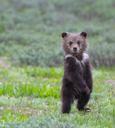

In [8]:
im = Image.open(dest)
im.to_thumb(128, 128)

In [9]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears2')

In [10]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results)

In [11]:
fns = get_image_files(path)
fns

(#539) [Path('bears2/black/c7ff6b11-1017-4ab3-a60f-cbc0ad114ab1.jpg'),Path('bears2/black/97b9bfc5-9590-407a-b5f3-b487ac9d0c37.JPG'),Path('bears2/black/3eee40ef-bd77-4a7a-a7be-27e5f06bdc98.jpg'),Path('bears2/black/943f1abd-b495-4ea5-9d94-353cfd54202e.jpg'),Path('bears2/black/f64cde66-905a-4896-911e-e8ea47d3da38.jpg'),Path('bears2/black/ddc0ab71-b693-4d28-97dd-11265e940062.jpg'),Path('bears2/black/0d945128-5617-40e9-a64b-dfd783f45f79.jpg'),Path('bears2/black/b3bf10ca-2648-426b-ba9b-236aaef04830.jpg'),Path('bears2/black/755f100b-53cd-415f-b53f-679458cc32ca.jpg'),Path('bears2/black/8f8ddd8c-d67c-49a9-8d28-c20a3fe4e016.jpeg'),Path('bears2/black/a20b8798-926b-4f2e-8d85-a7811d4f121a.jpg'),Path('bears2/black/2db73e6a-7a0e-481e-9cd2-bc2b949d0ba1.jpg'),Path('bears2/black/216a29a8-0551-4763-9e9b-b6f41e164278.jpg'),Path('bears2/black/4eaf829e-02f6-442f-a895-3f8ffb0cf0e4.jpg'),Path('bears2/black/34e46284-b38f-48aa-a612-92b955a51cad.jpg'),Path('bears2/black/8133d8e0-0373-4ac5-860c-e3022e7fe617.jpg')

In [12]:
failed = verify_images(fns)
failed

(#23) [Path('bears2/black/2ac9b450-d60e-407f-808e-fb8f0985dab0.jpg'),Path('bears2/black/a1eff869-c72d-4929-8847-733ffe397fa8.jpg'),Path('bears2/black/f7082027-288f-4286-a106-91b8a7411a06.JPG'),Path('bears2/black/b198bb90-ea0f-4d95-9627-414ac969a616.jpg'),Path('bears2/black/02f76d85-2ad3-4340-8116-4a50b5bdea17.jpg'),Path('bears2/black/f0885b3f-b5c6-4b50-9a58-36299bbfbf0c.jpg'),Path('bears2/black/26b96d0d-4441-46c8-8d89-21977cea833f.jpg'),Path('bears2/black/067bf51d-c89b-45da-a419-c1b4946fbb87.jpg'),Path('bears2/teddy/ebce3f9c-47e5-4693-8edd-a00e25329aa5.jpg'),Path('bears2/teddy/7d771cdf-04ac-4f90-913e-d8ecc297f5ac.jpg'),Path('bears2/teddy/dd74d0b7-131d-4f6d-a5c5-6f7982e7055d.jpg'),Path('bears2/teddy/63226973-97bc-4cae-aae5-f973b4086b2a.jpg'),Path('bears2/teddy/90f786ab-3c18-4695-9297-f55aa460c26f.png'),Path('bears2/teddy/abb99358-5107-4d53-a7ad-8631e08ad5e3.jpg'),Path('bears2/grizzly/c029ec65-8c24-4729-b71a-94ae7e6d31d6.jpg'),Path('bears2/grizzly/9beb981c-b415-4401-82ce-c51f1a1ed34c.JPG

In [13]:
failed.map(Path.unlink)

(#23) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

# Sidebar: How get help in Jupyter Notebooks

In [14]:
??verify_images

Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in enumerate(parallel(verify_image, fns)) if not o)
File:      /usr/local/lib/python3.10/dist-packages/fastai/vision/utils.py
Type:      function


or

In [15]:
?verify_images

Signature: verify_images(fns)
Docstring: Find images in `fns` that can't be opened
File:      /usr/local/lib/python3.10/dist-packages/fastai/vision/utils.py
Type:      function


# From Data to Dataloaders

In [16]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

In [17]:
dls = bears.dataloaders(path)

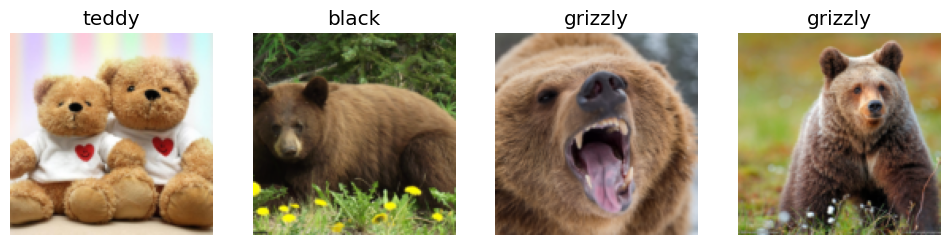

In [18]:
dls.valid.show_batch(max_n=4, nrows=1)

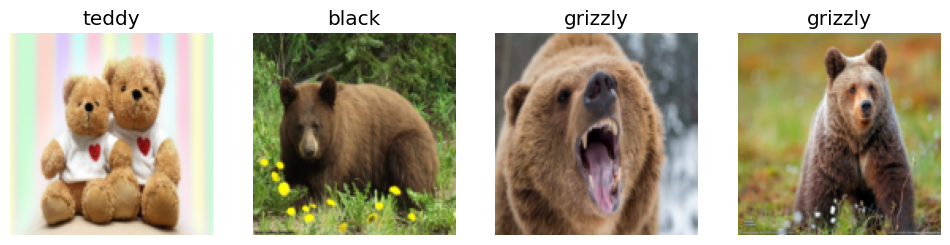

In [19]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

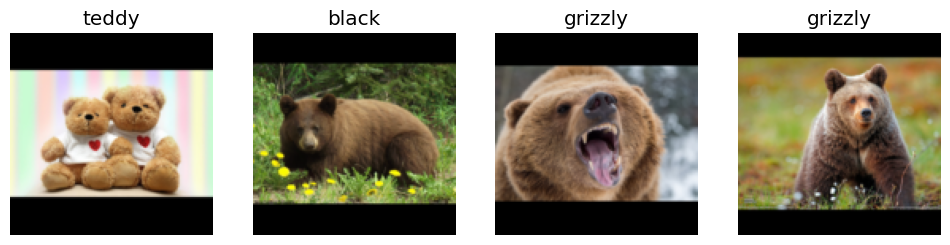

In [20]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

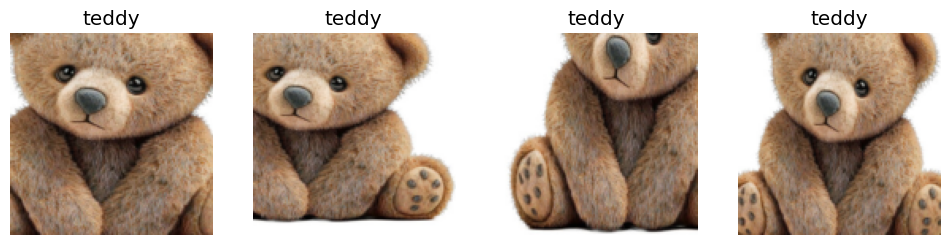

In [21]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique = True)

# Data Augmentation

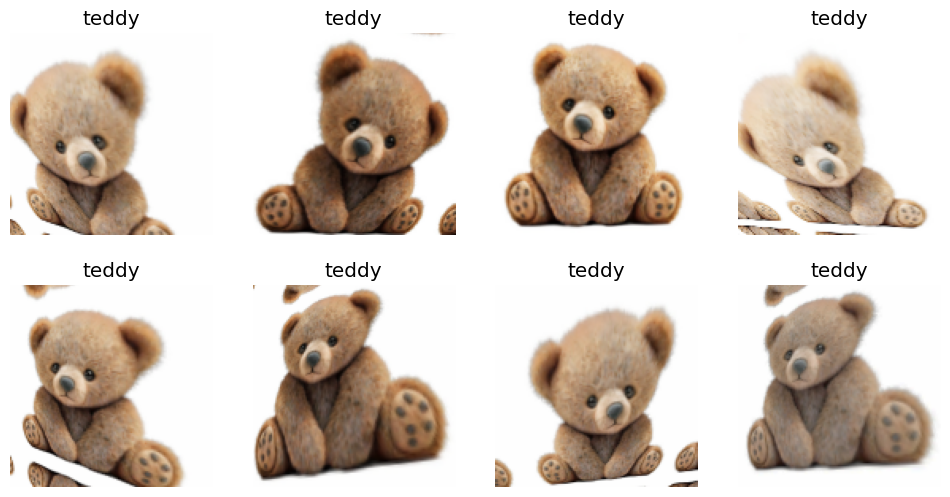

In [23]:
bears = bears.new(item_tfms = Resize(128), batch_tfms = aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

# Training Your Model, and Using It to Clean Your Data

In [24]:
bears = bears.new(
    item_tfms = RandomResizedCrop(224, min_scale = 0.5),
    batch_tfms = aug_transforms()
)
dls = bears.dataloaders(path)

In [25]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 147MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,1.194282,0.221458,0.077670,01:23


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.210867,0.204184,0.048544,01:51
1,0.175304,0.271601,0.048544,01:52
2,0.145180,0.309445,0.058252,01:51
3,0.128964,0.314046,0.058252,01:51


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


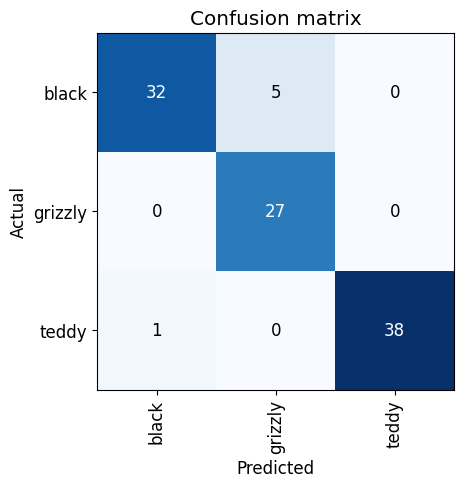

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

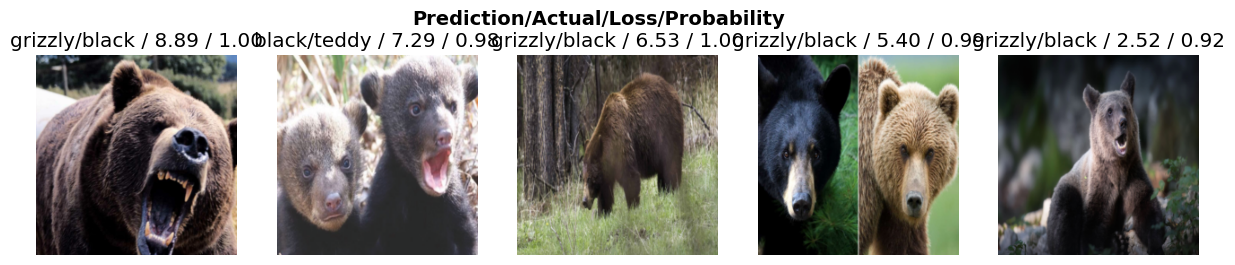

In [27]:
interp.plot_top_losses(5, nrows=1)

In [29]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# For Delete the things on cleaner
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

# For move the images to a different category.
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# Using the Model for Inference

In [30]:
learn.export()

In [31]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

## The whole process end-to-end from a loaded model

In [32]:
learn_inf = load_learner(path/'export.pkl')

In [33]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([1.1273e-05, 9.9998e-01, 4.0459e-06]))

In [34]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

# Creating a Notebook App from the Model